In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#read the text file
path = "C:\\Users\\User\\Downloads\\WhatsApp Chat - QLO Coordination\\_chat.txt"
f = open(path, 'r', encoding='utf-8')
data = f.read()
print(type(data))

<class 'str'>


In [3]:
# Regular expression pattern to find the dates, time, user, and message
pattern = r'\[(\d{2}/\d{2}/\d{2}), (\d{1,2}:\d{2}:\d{2} (?:AM|PM))\] (?:~ )?([^:]+): (.+)'


# Find all occurrences of the pattern
matches = re.findall(pattern, data)

# Initialize lists to store extracted components
dates = []
time = []
users = []
messages = []

# Loop through each match and extract components
for match in matches:
    dates.append(match[0])
    time.append(match[1])
    users.append(match[2])
    messages.append(match[3].strip())  # Remove leading and trailing whitespaces

# Create DataFrame
df = pd.DataFrame({'date': dates, 'time': time, 'user': users, 'message': messages})

# Convert date string type to datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')

df.head()

,date,time,user,message
0,2023-11-30,9:52:04 PM,Boban,‎video omitted
1,2023-12-01,7:17:43 AM,Boban,Bus is here. We will be leaving from office in...
2,2023-12-01,7:25:51 AM,Snehal 🌸,On my way
3,2023-12-01,5:25:50 PM,Koyel's,"People, we are leaving"
4,2023-12-01,5:25:55 PM,Koyel's,Koramangala bus is here


In [4]:
#Extract multiple columns from the Date Column
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()

df['time'] = pd.to_datetime(df['time'])

# Now you can access the dt accessor on the time column
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute

In [5]:
df.head(20)

,date,time,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2023-11-30,2024-05-01 21:52:04,Boban,‎video omitted,2023-11-30,2023,11,November,30,Thursday,21,52
1,2023-12-01,2024-05-01 07:17:43,Boban,Bus is here. We will be leaving from office in...,2023-12-01,2023,12,December,1,Friday,7,17
2,2023-12-01,2024-05-01 07:25:51,Snehal 🌸,On my way,2023-12-01,2023,12,December,1,Friday,7,25
3,2023-12-01,2024-05-01 17:25:50,Koyel's,"People, we are leaving",2023-12-01,2023,12,December,1,Friday,17,25
4,2023-12-01,2024-05-01 17:25:55,Koyel's,Koramangala bus is here,2023-12-01,2023,12,December,1,Friday,17,25
5,2023-12-01,2024-05-01 17:30:44,Vivek Singh Sikarwar,Bus is leaving in 5 mins,2023-12-01,2023,12,December,1,Friday,17,30
6,2023-12-01,2024-05-01 18:38:58,steven suting,‎image omitted,2023-12-01,2023,12,December,1,Friday,18,38
7,2023-12-01,2024-05-01 18:38:59,steven suting,‎image omitted,2023-12-01,2023,12,December,1,Friday,18,38
8,2023-12-01,2024-05-01 18:38:59,steven suting,‎image omitted,2023-12-01,2023,12,December,1,Friday,18,38
9,2023-12-01,2024-05-01 18:38:59,steven suting,‎image omitted,2023-12-01,2023,12,December,1,Friday,18,38


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       891 non-null    datetime64[ns]
 1   time       891 non-null    datetime64[ns]
 2   user       891 non-null    object        
 3   message    891 non-null    object        
 4   only_date  891 non-null    object        
 5   year       891 non-null    int64         
 6   month_num  891 non-null    int64         
 7   month      891 non-null    object        
 8   day        891 non-null    int64         
 9   day_name   891 non-null    object        
 10  hour       891 non-null    int64         
 11  minute     891 non-null    int64         
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Analysis: Display Basic Statistics for Data Analysis

In [7]:
#Total Messages
df.shape[0]

891

In [8]:
#Total Number of words
words = []
for message in df['message']:
  words.extend(message.split())

print(len(words))

5754


In [9]:
# Count the total number of images, videos, and contact cards shared
total_images = df[df['message'].str.contains('image omitted')].shape[0]
total_videos = df[df['message'].str.contains('video omitted')].shape[0]
total_polls = df[df['message'].str.contains('POLL')].shape[0]
total_contact_cards = df[df['message'].str.contains('Contact card omitted')].shape[0]
#total_invite link=df[df['message'].str.contains('invite link')].shape[0]

print("Total number of images shared:", total_images)
print("Total number of videos shared:", total_videos)
print("Total polls conducted:",total_polls )
print("Total number of contact cards shared:", total_contact_cards)
# print("Total joins via invite links")

Total number of images shared: 186
Total number of videos shared: 24
Total polls conducted: 40
Total number of contact cards shared: 2


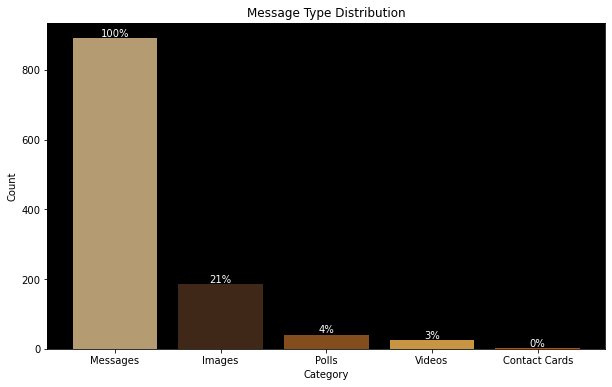

In [10]:
# Count the total number of images, videos, and contact cards shared
total_images = df[df['message'].str.contains('image omitted')].shape[0]
total_videos = df[df['message'].str.contains('video omitted')].shape[0]
total_polls = df[df['message'].str.contains('POLL')].shape[0]
total_contact_cards = df[df['message'].str.contains('Contact card omitted')].shape[0]

# Calculate total messages
total_messages = df.shape[0]

# Define categories and corresponding counts
categories = ['Messages', 'Videos', 'Images', 'Polls', 'Contact Cards']
counts = [total_messages, total_videos, total_images, total_polls, total_contact_cards]

# Calculate percentages
percentages = [count / total_messages * 100 for count in counts]

# Sort categories and corresponding counts by count
sorted_indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)
categories_sorted = [categories[i] for i in sorted_indices]
counts_sorted = [counts[i] for i in sorted_indices]
percentages_sorted = [percentages[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(categories_sorted, counts_sorted, color=['#b49b72', '#402818', '#834d1e', '#c89542', '#c14e06'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.gca().set_facecolor('black')
plt.title('Message Type Distribution')

# Add percentages above the bars
for bar, percentage in zip(bars, percentages_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.0f}%', ha='center', va='bottom', color='white')

plt.show()


In [14]:
x = df['user'].value_counts().head(10)
user_names = x.index
msg_count = x.values

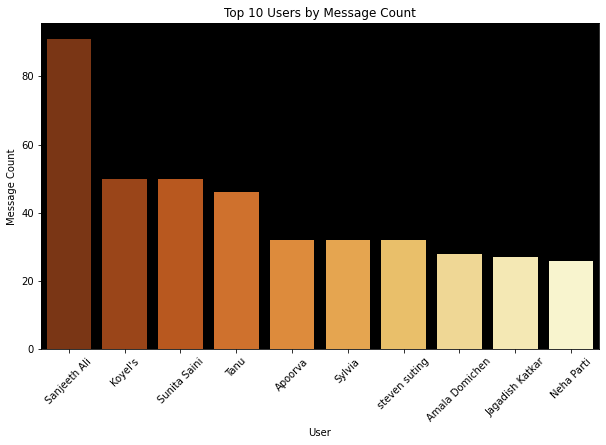

In [15]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=user_names, y=msg_count, palette='YlOrBr_r')
plt.xlabel('User')
plt.ylabel('Message Count')
plt.title('Top 10 Users by Message Count')
plt.xticks(rotation=45)
plt.gca().set_facecolor('black')
plt.show()

In [16]:
df[df['message'].str.contains('invite link')].shape[0]

17

In [17]:
# Create a boolean mask to filter rows
mask = ~df['message'].str.contains("this group's invite link")

# Apply the mask to filter the DataFrame
df2 = df[mask]

In [18]:
df2.head(20)

,date,time,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2023-11-30,2024-05-01 21:52:04,Boban,‎video omitted,2023-11-30,2023,11,November,30,Thursday,21,52
1,2023-12-01,2024-05-01 07:17:43,Boban,Bus is here. We will be leaving from office in...,2023-12-01,2023,12,December,1,Friday,7,17
2,2023-12-01,2024-05-01 07:25:51,Snehal 🌸,On my way,2023-12-01,2023,12,December,1,Friday,7,25
3,2023-12-01,2024-05-01 17:25:50,Koyel's,"People, we are leaving",2023-12-01,2023,12,December,1,Friday,17,25
4,2023-12-01,2024-05-01 17:25:55,Koyel's,Koramangala bus is here,2023-12-01,2023,12,December,1,Friday,17,25
5,2023-12-01,2024-05-01 17:30:44,Vivek Singh Sikarwar,Bus is leaving in 5 mins,2023-12-01,2023,12,December,1,Friday,17,30
6,2023-12-01,2024-05-01 18:38:58,steven suting,‎image omitted,2023-12-01,2023,12,December,1,Friday,18,38
7,2023-12-01,2024-05-01 18:38:59,steven suting,‎image omitted,2023-12-01,2023,12,December,1,Friday,18,38
8,2023-12-01,2024-05-01 18:38:59,steven suting,‎image omitted,2023-12-01,2023,12,December,1,Friday,18,38
9,2023-12-01,2024-05-01 18:38:59,steven suting,‎image omitted,2023-12-01,2023,12,December,1,Friday,18,38


In [19]:
df2[df2.user == 'Vinay J Quest Alliance']

,date,time,user,message,only_date,year,month_num,month,day,day_name,hour,minute
227,2024-02-21,2024-05-01 11:31:35,Vinay J Quest Alliance,Hii every shettal charging 🔋⚡ 4 to 5 hours,2024-02-21,2024,2,February,21,Wednesday,11,31
350,2024-02-29,2024-05-01 16:21:58,Vinay J Quest Alliance,‎image omitted,2024-02-29,2024,2,February,29,Thursday,16,21
408,2024-03-06,2024-05-01 09:39:44,Vinay J Quest Alliance,Come to proper loction please🙏,2024-03-06,2024,3,March,6,Wednesday,9,39
413,2024-03-06,2024-05-01 10:21:09,Vinay J Quest Alliance,Shettel battary down not possible take rema...,2024-03-06,2024,3,March,6,Wednesday,10,21
414,2024-03-06,2024-05-01 11:55:25,Vinay J Quest Alliance,‎image omitted,2024-03-06,2024,3,March,6,Wednesday,11,55
415,2024-03-06,2024-05-01 12:39:13,Vinay J Quest Alliance,It's ready,2024-03-06,2024,3,March,6,Wednesday,12,39
430,2024-03-07,2024-05-01 09:31:23,Vinay J Quest Alliance,Next trip is 9.45,2024-03-07,2024,3,March,7,Thursday,9,31
432,2024-03-07,2024-05-01 09:51:35,Vinay J Quest Alliance,Yes,2024-03-07,2024,3,March,7,Thursday,9,51
450,2024-03-07,2024-05-01 09:31:23,Vinay J Quest Alliance,Next trip is 9.45,2024-03-07,2024,3,March,7,Thursday,9,31
452,2024-03-07,2024-05-01 09:51:35,Vinay J Quest Alliance,Yes,2024-03-07,2024,3,March,7,Thursday,9,51


In [20]:
import emoji
from collections import Counter
import pandas as pd

emojis = []
for message in df2['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

emoji_counts = Counter(emojis)
pd.DataFrame(emoji_counts.most_common(len(emoji_counts)))

,0,1
0,😍,11
1,😂,7
2,❤,7
3,😊,6
4,👍,6
5,😅,5
6,🏻,5
7,🤩,4
8,😃,3
9,👌,3


C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


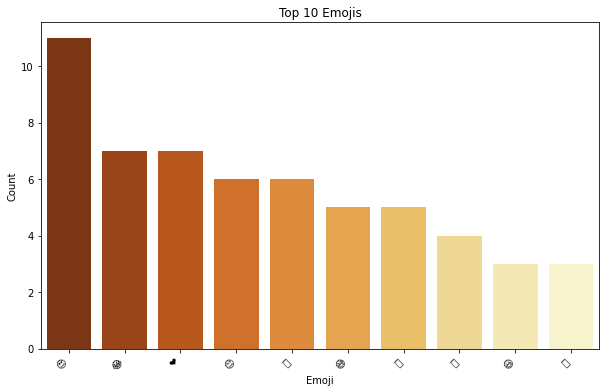

In [21]:
# Extract emojis from messages
emojis = []
for message in df2['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

# Count the occurrences of each emoji
emoji_counts = Counter(emojis)

# Get the top 10 emojis
top_10_emojis = dict(emoji_counts.most_common(10))

# Create DataFrame from top 10 emojis
df_top_emojis = pd.DataFrame({'Emoji': list(top_10_emojis.keys()), 'Count': list(top_10_emojis.values())})

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Emoji', y='Count', data=df_top_emojis, palette='YlOrBr_r')
plt.xlabel('Emoji')
plt.ylabel('Count')
plt.title('Top 10 Emojis')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128584 (\N{SEE-NO-EVIL MONKEY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda

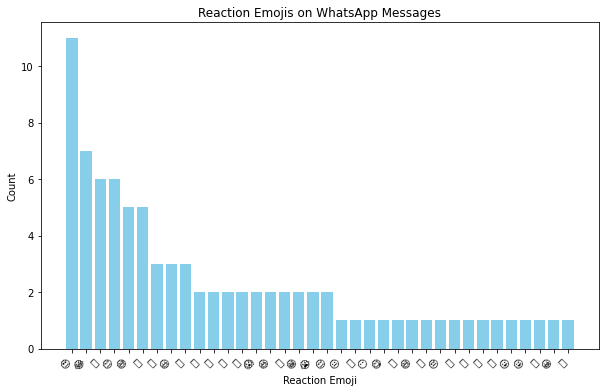

   Emoji  Count
10     😍     11
4      😂      7
17     👍      6
11     😊      6
1      😅      5
13     🏻      5
12     👌      3
7      😃      3
32     👥      3
29     🙈      2
23     🌼      2
21     🏽      2
20     🙏      2
28     😱      2
24     😆      2
25     🙋      2
5      😁      2
34     😭      2
2      😌      2
30     😐      1
31     🍻      1
33     😶      1
27     😋      1
26     👸      1
0      😄      1
18     🚀      1
22     😔      1
19     🔋      1
16     🏼      1
15     🎉      1
14     🕺      1
9      😛      1
8      😜      1
6      🌸      1
3      😀      1
35     💖      1


In [22]:
# Regular expression pattern to find messages with reaction emojis
pattern = r'\[(.*?)\] (.*?): (.*?)\s*(?::|\n)'

# Find all occurrences of messages with reaction emojis
matches = re.findall(pattern, data)

# Extract reaction emojis from each message
reaction_emojis = []
for match in matches:
    emojis = re.findall(r'[\U0001F300-\U0001F6FF]', match[2])  # Extract emojis using regex
    reaction_emojis.extend(emojis)

# Count the occurrences of each reaction emoji
reaction_counts = Counter(reaction_emojis)

# Convert reaction counts to DataFrame
df_reaction_counts = pd.DataFrame({'Emoji': list(reaction_counts.keys()), 'Count': list(reaction_counts.values())})

# Sort the DataFrame by count in descending order
df_reaction_counts = df_reaction_counts.sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_reaction_counts['Emoji'], df_reaction_counts['Count'], color='skyblue')
plt.xlabel('Reaction Emoji')
plt.ylabel('Count')
plt.title('Reaction Emojis on WhatsApp Messages')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display the DataFrame with reaction counts
print(df_reaction_counts)

In [23]:
# Assuming you have a DataFrame named 'df' with the columns you mentioned
# Join all the messages into a single string
text = ' '.join(message for message in df['message'])

# Remove "video omitted", "image omitted", and "POLL" from the text
text = text.replace("video omitted", "").replace("image omitted", "").replace("POLL", "")
text = text.replace("turned on disappearing messages. ‎New messages will disappear from this chat", "").replace("This message was deleted", "").replace("Shreya R added", "")
text = text.replace("edited message", "").replace("joined using this group's invite link","").replace("This message was edited","").replace("","")
# Print the cleaned text
print(text)

‎ Bus is here. We will be leaving from office in 15 minutes On my way People, we are leaving Koramangala bus is here Bus is leaving in 5 mins ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎. Hello People, ‎ Hi Team, Hello hello ‎Snehal LSC  ‎~ waghmare deepak  ‎~ Swamy  ‎~ christy  Koramangala bus is here Bus is leaving in 5 mins ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎. Hello People, ‎ Hi Team, Hello hello ‎Snehal LSC  ‎~ wag 🥹🥹 ‎ Oh no!!! Those glasses!!! It was perfect for rum punch🥺 People, the tables which are marked are for LO ‎Voice chat, ‎‎3 min • ‎6 joined ‎Voice chat, ‎‎0 sec • ‎0 joined ‎Voice chat, ‎‎0 sec • ‎0 joined ‎ We are closong dinner at 9:50 ‎ ‎~ Jagadish Katkar  ‎‎‎~ Ramya  ‎24 hours after they're sent, except when kept. ‎Tap to change. ‎‎~ Aparna Balakrishnan turned off disappearing messages. ‎Tap to change. Need to see apartments on the purple line preferably closer to the office! Anyone with leads please DM me. Check out vijayanagar, attiguppe area. Malleshwaram also is an option. Majestic stat

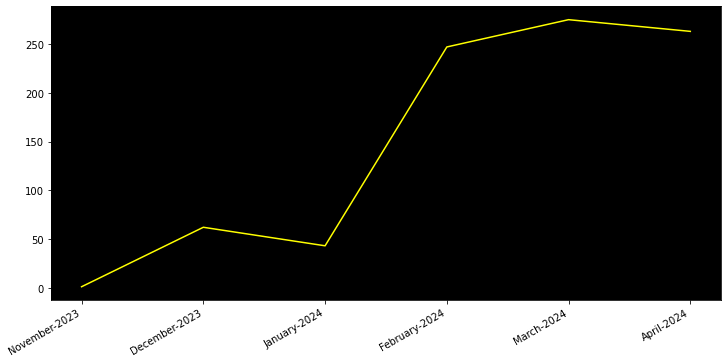

In [24]:
# Group by year, month_num, and month and count messages
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

# Combine month and year to form a time string
timeline['time'] = timeline['month'] + "-" + timeline['year'].astype(str)

# Draw plot
plt.figure(figsize=(12,6))
plt.plot(timeline['time'], timeline['message'], color='yellow')  # You can adjust the color here
plt.xticks(rotation='vertical')

# Set black background
plt.gca().set_facecolor('black')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')
plt.gcf().autofmt_xdate()  # Auto-format x-axis dates for better readability

plt.show()


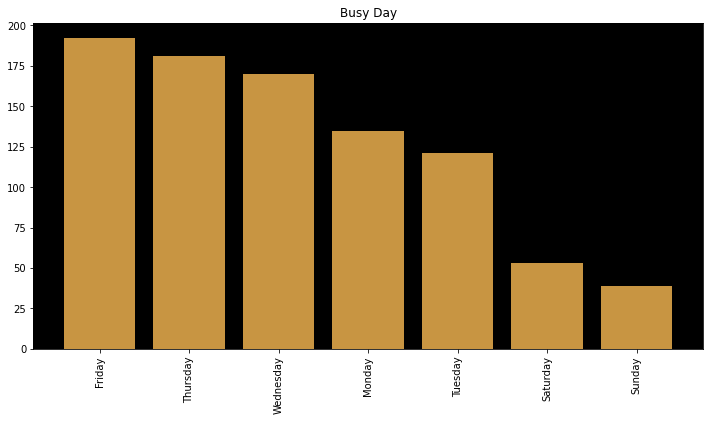

In [25]:
busy_day = df['day_name'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(busy_day.index, busy_day.values, color='#c89542')
plt.gca().set_facecolor('black')
plt.title("Busy Day")
plt.xticks(rotation='vertical')
plt.show()

In [26]:
#add period column that shows data capture between which 24 hour format
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period
df.head()

,date,time,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2023-11-30,2024-05-01 21:52:04,Boban,‎video omitted,2023-11-30,2023,11,November,30,Thursday,21,52,21-22
1,2023-12-01,2024-05-01 07:17:43,Boban,Bus is here. We will be leaving from office in...,2023-12-01,2023,12,December,1,Friday,7,17,7-8
2,2023-12-01,2024-05-01 07:25:51,Snehal 🌸,On my way,2023-12-01,2023,12,December,1,Friday,7,25,7-8
3,2023-12-01,2024-05-01 17:25:50,Koyel's,"People, we are leaving",2023-12-01,2023,12,December,1,Friday,17,25,17-18
4,2023-12-01,2024-05-01 17:25:55,Koyel's,Koramangala bus is here,2023-12-01,2023,12,December,1,Friday,17,25,17-18


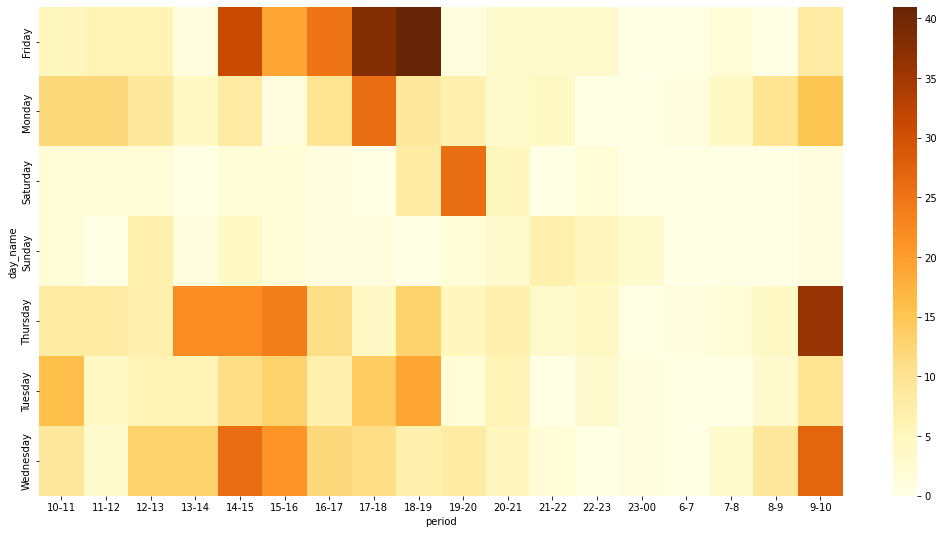

In [27]:
# Define custom palette
custom_palette = sns.color_palette("YlOrBr", as_cmap=True)

# Plot heatmap with dark background and custom palette
plt.figure(figsize=(18, 9))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', 
            aggfunc='count').fillna(0), cmap=custom_palette)
plt.yticks(rotation='vertical')
plt.show()

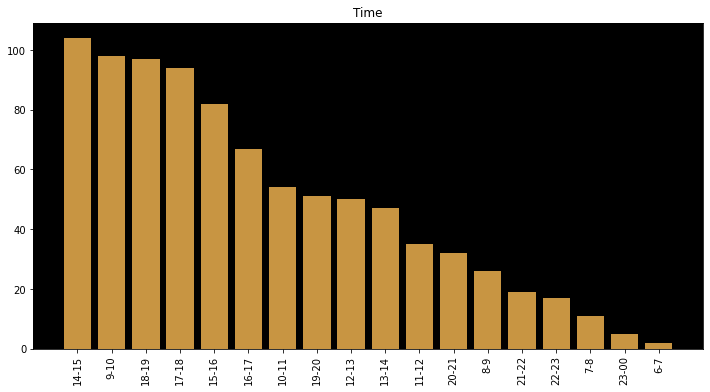

In [255]:
time_of_day = df['period'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(time_of_day.index, time_of_day.values, color='#c89542')
plt.gca().set_facecolor('black')
plt.title("Time")
plt.xticks(rotation='vertical')
plt.show()

In [270]:
df[ (df.period == "16-17")  | (df.period == "17-18")| (df.period == "18-19") & (df.day_name == "Friday")]

,date,time,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
3,2023-12-01,2024-04-30 17:25:50,Koyel's,"People, we are leaving",2023-12-01,2023,12,December,1,Friday,17,25,17-18
4,2023-12-01,2024-04-30 17:25:55,Koyel's,Koramangala bus is here,2023-12-01,2023,12,December,1,Friday,17,25,17-18
5,2023-12-01,2024-04-30 17:30:44,Vivek Singh Sikarwar,Bus is leaving in 5 mins,2023-12-01,2023,12,December,1,Friday,17,30,17-18
6,2023-12-01,2024-04-30 18:38:58,steven suting,‎image omitted,2023-12-01,2023,12,December,1,Friday,18,38,18-19
7,2023-12-01,2024-04-30 18:38:59,steven suting,‎image omitted,2023-12-01,2023,12,December,1,Friday,18,38,18-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2024-04-24,2024-04-30 17:55:34,Aravind,Anyone need daaru on election day around qlo 😆,2024-04-24,2024,4,April,24,Wednesday,17,55,17-18
883,2024-04-25,2024-04-30 16:23:55,Aparna Balakrishnan,‎image omitted,2024-04-25,2024,4,April,25,Thursday,16,23,16-17
884,2024-04-25,2024-04-30 16:27:14,Apoorva,Tanu wanted these so I kept them aside :),2024-04-25,2024,4,April,25,Thursday,16,27,16-17
885,2024-04-25,2024-04-30 16:41:43,Aparna Balakrishnan,Ok,2024-04-25,2024,4,April,25,Thursday,16,41,16-17
